In [450]:
import tensorflow as tf
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [451]:
#https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv
#link to download the CSV file
#line1-------------
Iris = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv")
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [452]:
Iris.shape

(150, 5)

In [453]:
#since we are gonna perform binary classification using Logistic Regression we will only include first 100 samples which consists of irises’ (Setosa and Versicolour)
#line2-------------
Iris=Iris.loc[:99,:]
Iris.shape

(100, 5)

In [454]:
'''Step 2: Numerical processing
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1'''
#line3-------------------------
Iris.species=pd.get_dummies(Iris.species,drop_first=True)

In [455]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


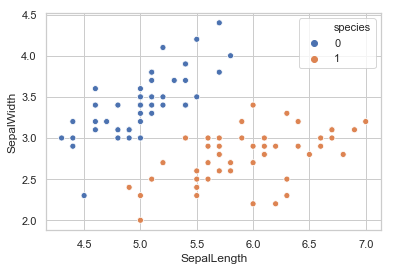

In [456]:
#visualization of given dataset
#codesegment4------------------
sns.scatterplot(x="sepal_length",y="sepal_width",data=Iris,hue="species")
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(loc="best")

In [457]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output


In [458]:
'''Step 3: Split data
trainset: 80%
testset: 20%'''
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
#line5-------------
np.random.seed(seed)
tf.set_random_seed(seed)
train_index=np.random.choice(100,80)
#line6-------------
#randomnly select 80% of the indices under variable train_index and rest under test_index
#line7-----------------------------------------------
test_index = np.array(list(set(range(len(X))) - set(train_index)))
test_index = np.array(list(set(range(len(X))) - set(train_index)))

In [459]:
train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]
train_X[:5]

array([[5.7, 2.8, 4.1, 1.3],
       [6. , 2.9, 4.5, 1.5],
       [5.9, 3. , 4.2, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [6.1, 2.8, 4.7, 1.2]])

In [460]:
# Define the min-max normalization function
def min_max_normalized(data): # we are using here min-max normalisation, helpful to bring down every values in all the feature columns of the dataset to common scale 
#codesegment8------------------
    m=data.min()
    M=data.max()
    data=(data-m)/(M-m)
    return data
f=train_X.shape[1]
for i in range(f):
    train_X[:,i]=min_max_normalized(train_X[:,i])
    test_X[:,i]=min_max_normalized(test_X[:,i])
test_X[:5]

array([[0.07692308, 0.77777778, 0.1025641 , 0.11764706],
       [0.38461538, 0.94444444, 0.12820513, 0.05882353],
       [0.15384615, 0.55555556, 0.1025641 , 0.        ],
       [0.26923077, 0.83333333, 0.1025641 , 0.11764706],
       [0.38461538, 0.77777778, 0.17948718, 0.05882353]])

In [461]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, so W's dimension is (4, 1)
#line9---------------------------- #weights
W = tf.Variable(tf.random_normal(shape=[4,1]))
b = tf.Variable(tf.random_normal(shape=[1, 1])) #bias
#constructor for random initialization
#line10
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [462]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])#comment on the difference between tf.placeholder and tf.variable-----
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [463]:
# Declare the 'model' you need to learn
#line11-------------------------------------------
mod = tf.matmul(data , W) + b

In [464]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [465]:
# Define the learning rate， batch_size and number of iterations.
#learning_rate
#line12--------------------------------
learning_rate = 0.01
#batch_size---- #using batch makes the training ------?
batch_size = 30
#line13-------------------------------
#iter_num
iter_num = 1000

In [466]:
# Define the optimizer with name opt
#line14-----------------------------
opt = tf.train.GradientDescentOptimizer(learning_rate)
# Define the goal
goal = opt.minimize(loss)

In [467]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [468]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []

In [469]:
# training model using mini-batch gradient descent
for epoch in range(iter_num):
    # Generate random batch_index
    #line15------------------------------ #randomnly picks up up 30 sample data from the train_X
    batch_index = np.random.choice(len(train_X),batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    #Similarly store train accuracy value for current epoch using sess.run
    #line16---------------------------
    temp_train_acc = sess.run(accuracy,feed_dict={data: batch_train_X,target: batch_train_y})
    # recode the results of loss and train accuracy
    #codesegment17---------------------
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    temp_test_acc = sess.run(accuracy, feed_dict = {data: test_X,target: np.matrix(test_y).T})
    # output
    if (epoch + 1) % 100 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                         temp_train_acc, temp_test_acc))
sess.close()        
#Write the command to calculate test accuracy:
#line18-------------------------------
print("The test accuracy is: {:5f}".format(temp_test_acc))

epoch:  100 loss: 0.673809 train_acc: 0.433333 test_acc: 0.545455
epoch:  200 loss: 0.627657 train_acc: 0.333333 test_acc: 0.568182
epoch:  300 loss: 0.431490 train_acc: 0.933333 test_acc: 0.863636
epoch:  400 loss: 0.394539 train_acc: 1.000000 test_acc: 1.000000
epoch:  500 loss: 0.319488 train_acc: 1.000000 test_acc: 1.000000
epoch:  600 loss: 0.285923 train_acc: 1.000000 test_acc: 1.000000
epoch:  700 loss: 0.241011 train_acc: 1.000000 test_acc: 1.000000
epoch:  800 loss: 0.253237 train_acc: 1.000000 test_acc: 1.000000
epoch:  900 loss: 0.223385 train_acc: 1.000000 test_acc: 1.000000
epoch: 1000 loss: 0.212059 train_acc: 1.000000 test_acc: 1.000000
The test accuracy is: 1.000000


Text(0.5, 1.0, ' Cross Entropy Loss ')

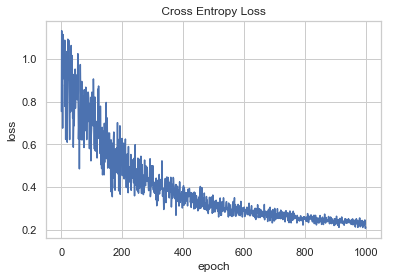

In [470]:
# Visualization of the results
# loss function
#codesegment19------------------------
sns.lineplot(np.arange(len(loss_trace)),loss_trace)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title(" Cross Entropy Loss ")

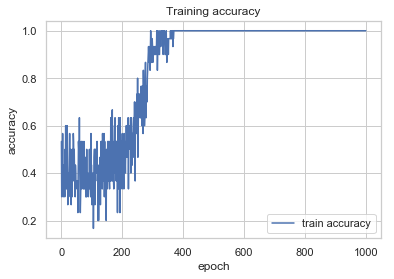

In [471]:
# plot for training accuracy
#codesegment20---------------------------
plt.plot(train_acc,label="train accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Training accuracy")
plt.legend()
plt.show()
